In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
# View all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [8]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [9]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
ayr = dt.date(2017, 8, 1) - dt.timedelta(days = 365)
temp12M = calc_temps(ayr, '2017-08-01')
print(temp12M)
print(ayr)

[(58.0, 74.64288840262581, 87.0)]
2016-08-01


In [10]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

Ttemp=[]
for tmin, tavg, tmax in temp12M:
    a = {}
    a["TMIN"] = tmin
    a["TAVG"] = tavg
    a["TMAX"] = tmax
    Ttemp.append(a)
    
Ttemp
#temp12M[0][1]

[{'TMIN': 58.0, 'TAVG': 74.64288840262581, 'TMAX': 87.0}]

In [11]:
yerr1 = Ttemp[0]["TMAX"]-Ttemp[0]["TMIN"]
yerr1

29.0

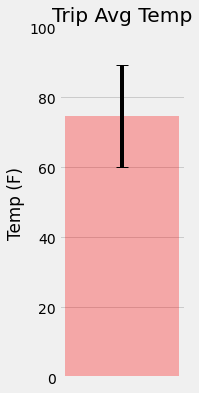

In [12]:
plt.figure(figsize = (2, 6))
x = np.arange(1)
plt.grid(axis='x')
plt.bar(x, Ttemp[0]["TAVG"], yerr=yerr1/2, color='red', alpha=0.3, capsize=6, width = 1)
plt.ylabel("Temp (F)")
plt.xticks(x, (''))
plt.title("Trip Avg Temp")
plt.ylim(0,100)
plt.show()

### Daily Rainfall Average

In [13]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def calc_prcp(start_date, end_date):
    sel = [Measurement.station, func.sum(Measurement.prcp)]
    return session.query(*sel).\
        group_by(Measurement.station).\
        order_by(func.sum(Measurement.prcp).desc()).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).all()

#Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation
#filter(Measurement.station == Station.station).\    

In [14]:
ayr = dt.date(2017, 8, 1) - dt.timedelta(days = 365)
prcp12M = calc_prcp(ayr, '2017-08-01')

In [15]:
print(len(prcp12M))
print(ayr)
prcp12M

7
2016-08-01


[('USC00516128', 157.91000000000005),
 ('USC00519281', 79.49000000000005),
 ('USC00513117', 54.39000000000004),
 ('USC00519523', 39.800000000000004),
 ('USC00514830', 34.25999999999999),
 ('USC00519397', 17.199999999999992),
 ('USC00517948', 4.77)]

In [16]:
Tprcp=[]
for station, total_rainfall in prcp12M:
    b = {}
    b["Station"] = station
    b["Total_Rainfall"] = total_rainfall
    Tprcp.append(b)
Tprcp  

[{'Station': 'USC00516128', 'Total_Rainfall': 157.91000000000005},
 {'Station': 'USC00519281', 'Total_Rainfall': 79.49000000000005},
 {'Station': 'USC00513117', 'Total_Rainfall': 54.39000000000004},
 {'Station': 'USC00519523', 'Total_Rainfall': 39.800000000000004},
 {'Station': 'USC00514830', 'Total_Rainfall': 34.25999999999999},
 {'Station': 'USC00519397', 'Total_Rainfall': 17.199999999999992},
 {'Station': 'USC00517948', 'Total_Rainfall': 4.77}]

In [17]:
dfprcp = pd.DataFrame(prcp12M, columns = ["Station", "Total_Rainfall"])
print(len(dfprcp))
dfprcp

7


,Station,Total_Rainfall
0,USC00516128,157.91
1,USC00519281,79.49
2,USC00513117,54.39
3,USC00519523,39.80
4,USC00514830,34.26
5,USC00519397,17.20
6,USC00517948,4.77


In [18]:
#list the station, name, latitude, longitude, and elevation
sel1 = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
sta = session.query(*sel1).all()
sta

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [19]:
#list the station, name, latitude, longitude, and elevation
dfstation = pd.DataFrame(sta, columns = ["Station", "Name", "Latitude", "Longitude", "Elevation"])
print(len(dfstation))
dfstation

9


,Station,Name,Latitude,Longitude,Elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [20]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
mdfprcp = pd.merge(dfprcp, dfstation, on = 'Station')
mdfprcp

,Station,Total_Rainfall,Name,Latitude,Longitude,Elevation
0,USC00516128,157.91,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,79.49,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,54.39,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00519523,39.80,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,USC00514830,34.26,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519397,17.20,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00517948,4.77,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [21]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [22]:
daily_normals("08-05")

[(69.0, 76.14814814814815, 82.0)]

In [23]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
dates_R = pd.date_range(start = start_date, end = end_date)
dates_R

DatetimeIndex(['2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-05', '2017-08-06', '2017-08-07'],
              dtype='datetime64[ns]', freq='D')

In [24]:
dfd1 = pd.DataFrame({'trip_dates':pd.date_range(start = start_date, end = end_date)})

In [25]:
# Strip off the year and save a list of strings in the format %m-%d
dfd = pd.DataFrame({'trip_dates':pd.date_range(start = start_date, end = end_date)})
dfd['trip_dates'] = pd.to_datetime(dfd['trip_dates'], format='%Y-%m-%d')
dfd['date_m_d']=dfd.trip_dates.dt.strftime('%m-%d')
dfd['date_m_d']

0    08-01
1    08-02
2    08-03
3    08-04
4    08-05
5    08-06
6    08-07
Name: date_m_d, dtype: object

In [26]:
len(dfd)

7

In [27]:
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals=[]
normal2=[]
for a in dfd['date_m_d']:
    aa = daily_normals(a)
    normals.append(aa)
normals

[[(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(69.0, 76.14814814814815, 82.0)],
 [(67.0, 76.25, 83.0)],
 [(71.0, 77.15686274509804, 83.0)]]

In [28]:
normal_TMIN=[]
normal_TAVG=[]
normal_TMAX=[]
for a in dfd['date_m_d']:
    aa = daily_normals(a)
    normal_TMIN.append(aa[0][0])
    normal_TAVG.append(aa[0][1])
    normal_TMAX.append(aa[0][2])

In [29]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
dftrip = pd.DataFrame(normal_TMIN, columns = ["TMin"])
dftrip["TAvg"] = pd.DataFrame(normal_TAVG)
dftrip["TMax"] = pd.DataFrame(normal_TMAX)
dftrip

,TMin,TAvg,TMax
0,67.0,75.540000,83.0
1,68.0,75.603774,84.0
2,70.0,76.611111,85.0
3,69.0,76.711538,84.0
4,69.0,76.148148,82.0
5,67.0,76.250000,83.0
6,71.0,77.156863,83.0


In [30]:
dftripm = dfd.merge(dftrip,left_index=True, right_index=True)
del dftripm['date_m_d']
dftripm

,trip_dates,TMin,TAvg,TMax
0,2017-08-01,67.0,75.540000,83.0
1,2017-08-02,68.0,75.603774,84.0
2,2017-08-03,70.0,76.611111,85.0
3,2017-08-04,69.0,76.711538,84.0
4,2017-08-05,69.0,76.148148,82.0
5,2017-08-06,67.0,76.250000,83.0
6,2017-08-07,71.0,77.156863,83.0


In [31]:
dftripm.set_index('trip_dates', inplace=True)
dftripm

,TMin,TAvg,TMax
trip_dates,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


In [32]:
dfd1

,trip_dates
0,2017-08-01
1,2017-08-02
2,2017-08-03
3,2017-08-04
4,2017-08-05
5,2017-08-06
6,2017-08-07


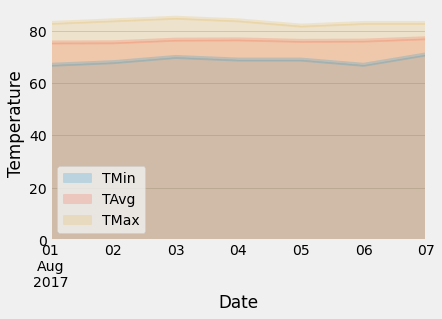

In [37]:
# Plot the daily normals as an area plot with `stacked=False`
dftripm.plot.area(stacked=False, alpha=0.2)

plt.ylabel("Temperature")
plt.xlabel("Date")
plt.show()

## Close Session

In [34]:
session.close()